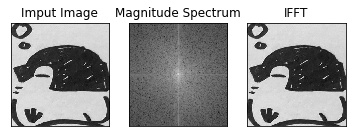

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 画像の読み込み
img = cv2.imread('original.jpg',cv2.IMREAD_GRAYSCALE)

# フーリエ変換
f = np.fft.fft2(img) 
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# 逆フーリエ変換
f_ishift = np.fft.ifftshift(fshift) 
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# 画像表示
plt.subplot(131),plt.imshow(img, cmap='gray')
plt.title('Imput Image'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back, cmap='gray')
plt.title('IFFT'),plt.xticks([]), plt.yticks([])

plt.show()

In [27]:
# 関数の定義

m_black = np.zeros(fshift.shape)
A = False

# 逆フーリエ変換
def ifft(m_black):
    ifft = m_black*fshift
    ifft = np.fft.fftshift(ifft)
    ifft = np.fft.ifft2(ifft)
    ifft = np.abs(ifft)
    ifft = np.uint8(ifft.real)
    cv2.imshow('Result', ifft)

# sin波
def sin(x, y):
    s_black = np.zeros((img.shape))
    s_black[y, x] = 1
    sin = 3*s_black*fshift
    sin = np.fft.fftshift(sin)
    sin = np.fft.ifft2(sin)
    sin = np.uint8(sin.real)
    cv2.imshow('Sin', sin)
    
# マウスイベント時に処理を行う
def mouse_event(event, x, y, flags, param):
    global A

    if event == cv2.EVENT_LBUTTONDOWN: # 左ボタンを押したとき
        A = False

    elif event == cv2.EVENT_LBUTTONUP: # 左ボタンを上げたとき
        m_black[y:y+3, x:x+3] = 1
        sin(x, y)
        ifft(m_black)
        A = True

    elif event == cv2.EVENT_MOUSEMOVE and A: # マウスが動いた時
        if A:
            m_black[y:y+3, x:x+3] = 1
            sin(x, y)
            ifft(m_black)
            A = True

cv2.namedWindow('Result')
cv2.namedWindow('Sin')
cv2.namedWindow('m_black')

# マウスイベント時に関数mouse_eventの処理を行う
cv2.setMouseCallback('m_black', mouse_event)

# 「Q」が押されるまで画像を表示する
while (True):
    cv2.imshow("m_black", m_black)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

plt.show()
plt.close()
cv2.destroyAllWindows()  